<div align="center"> 
    
# **Trabajo Práctico 1: Procesamiento Digital de Señales.**

### Universidad Nacional de Tres de Febrero

 ## Realizado por: Micaela Fopiano, Marcos Montemarano y Luciano Santantonio
 
 

    
    

### En este trabajo se desarrollarán distintos códigos que permitirán el análisis de señales de audio.

 En primer lugar se importarán las librerías requeridas para el desarrollo de los scripts:


In [4]:
import numpy as np # Versión 1.20.3
import matplotlib.pyplot as plt # Versión 3.4.3
import librosa # Versión 0.8.1
import soundfile as sf # Versión 0.10.3
import scipy as sp
from scipy.fftpack import fft
from scipy.signal import fftconvolve

## Punto 1
Sintetizar una señal discreta, que simule una nota musical (LA 440), de 2 segundos de duración, muestreada a 44100 Hz.
Considerar 5 componentes armónicas, la fundamental y cuatro armónicos consecutivos. Consideren una ley de decaimiento para la amplitud de los armónicos de $\frac{1}{n}$, en donde n es el número de armónico, siendo $n=1$ la fundamental de la señal. Normalizar a la señal final sintetizada $x[n]$ y graficar las componentes por separado y la señal total.

Comenzamos generando la señal con sus armónicos.

In [5]:
K = 5 # Número de armónicos
f0 = 440 # Frecuencia fundamental 
fs = 44100 # Frecuencia de muestreo (muestras/seg)
N = 2 * fs # Longitud de la señal (muestras)
n = np.arange(0,2,1/N) # Vector tiempo discreto

tono1 = 1 * np.sin(2*np.pi*f0*n)
tono2 = 1/2 * np.sin(2*np.pi*(2*f0)*n)
tono3 = 1/3 * np.sin(2*np.pi*(3*f0)*n)
tono4 = 1/4 * np.sin(2*np.pi*(4*f0)*n)
tono5 = 1/5 * np.sin(2*np.pi*(5*f0)*n)

A = tono1 + tono2 + tono3 + tono4 + tono5 #x(n)
A = A/max(A) 

Luego procedemos a graficar.

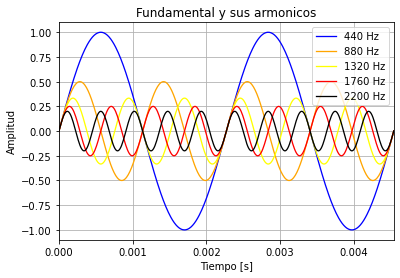

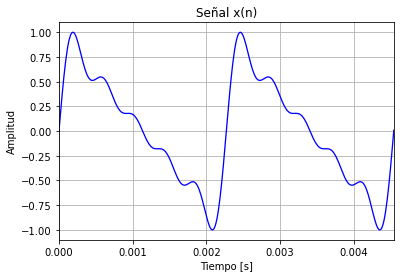

In [6]:
plt.figure()
plt.xlim(0,2/f0) 
plt.plot(n, tono1, linewidth=1.3, label='440 Hz',
color='blue')
plt.plot(n, tono2, linewidth=1.3, label='880 Hz',
color='orange')
plt.plot(n, tono3, linewidth=1.3, label='1320 Hz',
color='yellow')
plt.plot(n, tono4, linewidth=1.3, label='1760 Hz',
color='red')
plt.plot(n, tono5, linewidth=1.3, label='2200 Hz',
color='black')
plt.title('Fundamental y sus armonicos')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()
plt.legend(fontsize='medium')
plt.figure()
plt.xlim(0,2/f0)
plt.title('Señal x(n)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()
plt.plot(n,A,linewidth=1.3,color='blue')

Por último, calculamos las transformadas de la señal, inclusive la de los componentes armónicos, para su visualización en  frecuencia.

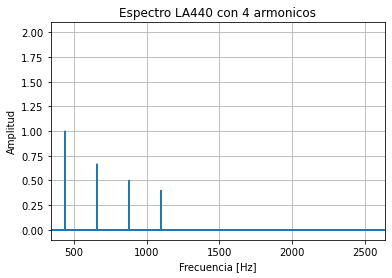

In [7]:
espectro1 = sp.fftpack.fft(A) # Transformada rapida de Fourier a la señal
eje_frec = sp.fftpack.fftfreq(len(A)) * fs # Almacenar en un array desde 0 Hz hasta fs/2 Hz 
espectro1 /= max(espectro1) # Aplica modulo a la transformada para plotear magnitud

plt.figure(1)    
plt.plot(eje_frec,abs(espectro1))
plt.title('Espectro LA440 con 4 armonicos')
plt.xlim(f0-100,f0*6) # Limites considerables para visualizar los armonicos
plt.xlabel('Frecuencia [Hz]') 
plt.ylabel('Amplitud')
plt.grid()

## Punto 2

Para simular una señal de ruido, se les pide generar señales aleatorias, normalmente distribuidas (Gaussianas), con valor medio nulo y desviación estándar unitaria. Calcular para las longitudes (L) dadas en la tabla, la desviación estándar en cada caso y determinar la diferencia porcentual entre lo calculado y lo esperado ($\sigma$ = 1). Utilizar funciones ya existentes (en las bibliotecas del lenguaje) para la generación de las señales aleatorias y crear su función propia para el cálculo del desvío
estándar.

## Punto 3

A la señal $x[n]$ sintetizada en el punto 1, sumarle ruido de media cero y desvíos de $\sigma$ = 0.1, $\sigma$ = 1 y $\sigma$ =3.0 para generar respectivamente tres nuevas señales $x_{01}$, $x_1$ y $x_3$. Normalizar y graficar cada una.

Calcular la relación señal a ruido de las nuevas señales. La relación señal a ruido ($SNR$: Signal to Noise Ratio) se puede calcular con la siguiente definición: 

$$
SNR = \frac{Amplitud_{señal}}{\sigma _ {ruido}}
$$

Se suele utilizar un valor de $SNR = 3$ como límite de detección convencional, eso quiere decir que cualquier señal con una relación SNR superior a 3 se puede diferenciar del ruido. En caso que no se pueda medir el ruido por separado de la señal, se debe tratar de medir la desviación estándar del ruido en una zona donde se sepa, o presuma, que no hay señal, en el rango más amplio posible para contar con mayor estadística y mejorar la estimación. Analizar el efecto de agregar una componente
de continua ($x[n] + c$) en la determinación de la $SNR$.

Generamos las señales de ruido con sus respectivas desviaciones estándar 

## Punto 4

Generar 10 señales de ruido, diferentes entre sí, con media nula y $\sigma$ = 3, y sumarlas a la señal del punto 1. Deben quedar 10 señales diferentes con la información de la señal más el ruido. Luego, calcular la señal promedio de todas las señales con el ruido agregado, calcular la relación $SNR$ de la señal promediada y comparar el valor con la obtenida en el punto 3. Volver a repetir el punto con 100 y 1000 señales en el promedio. A esta técnica se la denomina promedio en el ensamble, o simplemente promediado.

## Punto 5 

Se implementará ahora un filtro de media móvil (Moving Average, MA) que responde a las ecuaciones de respuesta al impulso y relación entrada-salida que se dan a continuación. Esta es una de las tantas versiones posibles.

Se les pide implementar dos funciones, una directa que se llame $xfd = mediamovild(x,M)$, y otra implementación recursiva $xfr = mediamovildr(x,M)$ que reciben como entrada a la señal x y la longitud de la ventana M del filtrado, y devuelve la señal filtrada xfd o xfr. Comparar los tiempos de ejecución de cada una.

$$
h[n] = \frac{1}{M + 1} \sum_{k=0}^{M}\delta [n + k] \hspace{2cm} y[n] = \frac{1}{M + 1} \sum_{k=0}^{M}x [n + k]
$$

Comenzamos generando las funciones pedidas. La misma realiza el filtrado para cada muestra. Además, cuando empiezan a quedar en el audio menos muestras que la longitud M del filtro, se agrega ceros de manera tal de filtar siempre trozos de la señal de largo M.

Por ejemplo, si a la señal le quedan las últimas 9 muestras y estamos trabajando con un filtro de de media móvil de longitud 10, le agrega un cero a la señal, y así sucesivamente.

## Punto 6 

Otra forma de aplicar un filtro es mediante la convolución de la señal con la respuesta al impulso del filtro. Repetir el punto 
5 pero realizando el filtrado mediante la operación de convolución lineal con la respuesta al impulso dada en el punto 5. Utilizar el mismo valor de M que se seleccionó en el punto 5. Comparar gráficamente las señales filtradas del punto 5 y 6, con amplitud normalizada.

## Punto 7 

Repetir el punto 6, pero la ventana a utilizar es ahora una ventana de Blackman (en lugar de la rectangular). 
​
$$
v[n] = a_0 - a_1 cos(\frac{2 \pi n}{M -1}) + a_2 cos(\frac{4 \pi n}{M - 1})
$$
​
$$
a_0 = 0.42 \hspace{1cm} a_1 = 0.5 \hspace{1cm} a_2 = 0.08
$$

## Punto 8

Convolucionar linealmente la señal sintetizada en el punto 1 con la respuesta al impulso *resp_imp.wav* (buscarla en la carpeta del aula virtual). Luego convolucionar en forma circular las dos señales con un largo igual a la señal respuesta al impulso. Finalmente, calcular con convolución circular, modificando las señales de forma tal de que el resultado sea igual a la convolución lineal. En todos los casos, graficar las señales convolucionadas y generar los archivos *.wav* correspondientes.

Primero, definimos la funcón de convolución circular tal como la que nos brindó por la cátedra.

## Punto 9 

## Punto 10 